# 机器学习工程师纳米学位
## 模型评价与验证
## 项目 1: 预测波士顿房价


欢迎来到预测波士顿房价项目！在此文件中，我们已经提供了一些示例代码，但你还需要完善更多功能才能让项目成功运行。除非有明确要求，你无需修改任何已给出的代码。习题的标题为**编程练习**。每一部分都会有详细的指导，需要实现的部分也会在注释中以**TODO**标出。请仔细阅读所有的提示！

除了实现代码外，你还**必须**回答一些问题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们的项目审阅者将会根据你对问题的回答和撰写代码所实现的功能来进行评分。

>**提示：**代码 和 Markdown单元格 可通过 **Shift + Enter** 快捷键运行。另外，Markdown单元格  可以通过双击进入编辑模式。

---
## 第一步. 导入数据
在这个项目中，你将使用我们提供的波士顿房屋信息数据来训练和测试一个模型，并对模型的性能和预测能力进行评估。我们希望可以通过该模型实现对房屋的价值预估，提高房地产经纪人的工作效率。

此项目的数据集来自[kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)原始数据，未经过任何处理。该数据集统计了2006年至2010年波士顿个人住宅销售情况，包含2900多条观测数据（其中一半是训练数据，即我们的`housedata.csv`文件）。更多文档信息可以参考[作者的文档](http://jse.amstat.org/v19n3/decock.pdf)（可以不看），以及项目附件`data_description.txt`文件（特征描述文件，一定要看）。

运行下面区域的代码以载入一些此项目所需的Python库。如果成功返回提示语句，则说明载入成功。

In [1]:
# 载入此项目需要的库
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code 补充的可视化代码
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn') # use seaborn style 使用seaborn风格

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
print('你已经成功载入所有库！')

你已经成功载入所有库！


### 编程练习 1：加载数据
你的第一个编程练习是加载波士顿房价数据。我们已为你导入了 ` Pandas `，你需要使用这个库中的[read_csv方法](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)来执行必要的过程。

导入数据将会是你整个项目的开始

如果成功返回数据集的大小，表示数据集已载入成功。

In [2]:
# 1 TODO：载入波士顿房屋的数据集：使用pandas载入csv，并赋值到data_df
data_df = pd.read_csv('housedata.csv')

# 成功载入的话输出训练数据行列数目
print("Boston housing dataset has {} data points with {} variables each.".format(*data_df.shape))

Boston housing dataset has 1460 data points with 81 variables each.


---
## 第二步. 数据分析
这个部分，你要对已有的波士顿房地产数据进行初步的观察与处理。同时，通过对数据的探索可以让你更好地理解数据。

由于这个项目的最终目标是建立一个预测房屋价值的模型，我们需要将数据集分为**特征(features)**和**目标变量(target variable)**。
- **目标变量**：` 'SalePrice'`，是我们希望预测的变量。
- **特征**：除` 'SalePrice'`外的属性都是特征，它们反应了数据点在某些方面的表现或性质。

### 编程练习 2：观察数据
你的第二个编程练习是对波士顿房价的数据进行观察,这一步会让你掌握更多数据本身的信息。具体问题如下：

**问题2.1：使用[head方法](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html)打印并观察前7条`data_df`数据**

In [3]:
# 2.1 TODO: 打印出前7条data_df
data_df.head(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000


**问题2.2：Id特征对我们训练数据没有任何用处，在`data_df`中使用[drop方法](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)删除`'Id'`列数据**

In [4]:
# 2.2 TODO: 删除data_df中的Id特征（保持数据仍在data_df中，不更改变量名）
data_df = data_df.drop(['Id'], axis=1)

**问题2.3：使用[describe方法](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)观察`data_df`各个特征的统计信息：**

In [5]:
# 2.3 TODO:
data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

### 编程练习3： 数据预处理
我们的数据不可能是百分百的‘干净’数据（即有用数据），总会在采集整理时有些”失误“、“冗余”，造成“脏”数据，所以我们要从数据的正确性和完整性这两个方面来清理数据。

- **正确性**：一般是指有没有异常值，比如我们这个数据集中[作者的文档](http://jse.amstat.org/v19n3/decock.pdf)所说：
`I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these five unusual observations) before assigning it to students.`
建议我们去掉数据中`'GrLivArea'`中超过4000平方英尺的房屋（具体原因可以参考文档），当然本数据集还有其他的异常点，这里不再处理。
- **完整性**：采集或者整理数据时所产生的空数据造成了数据的完整性缺失，通常我们会使用一定的方法处理不完整的数据。在本例中，我们使用以下两种方法，一是[丢弃数据](https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456),即选择丢弃过多空数据的特征（或者直接丢弃数据行，前提是NA数据占比不多），二是填补数据，填补的方法也很多，均值中位数众数填充等等都是好方法。

**问题3.1：正确性**

请按下述步骤删除一些不合理的数据

**问题3.1.1：使用`matplotlib`库中的[scatter方法](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) 绘制`'GrLivArea'`和`'SalePrice'`的散点图，x轴为`'GrLivArea'`，y轴为`'SalePrice'`，观察数据**

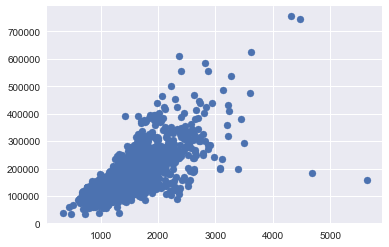

In [7]:
# 3.1.1 TODO:绘制要求的图形
plt.scatter(data_df['GrLivArea'], data_df['SalePrice']);

**问题3.1.2：通过上图我们可以看到那几个异常值，即`'GrLivArea'`大于4000，但是`'SalePrice'`又极低的数据，从`data_df`删除这几个异常值，删除后重新绘制`'GrLivArea'`和`'SalePrice'`的关系图，确认异常值已删除。**

In [8]:
data_df.query('GrLivArea > 4000').query('SalePrice < 300000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


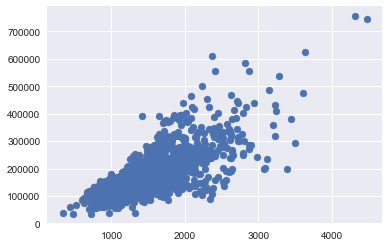

In [9]:
# 3.1.2 
# TODO:从data_df中删除 GrLivArea大于4000 且 SalePrice低于300000 的值
data_df = data_df.drop(data_df.query('GrLivArea > 4000').query('SalePrice < 300000').index, axis=0)

# TODO:重新绘制GrLivArea和SalePrice的关系图，确认异常值已删除
plt.scatter(data_df['GrLivArea'], data_df['SalePrice']);


In [10]:
data_df.query('GrLivArea > 4000').query('SalePrice < 300000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**问题3.2：完整性**

请按下述步骤，补足数据的完整性

**问题3.2.1：筛选出过多空数据的特征，我们这个项目定为筛选出有超过25%为空数据的特征**

In [11]:
limit_percent = 0.25
limit_value = len(data_df) * limit_percent
# 3.2.1 TODO 统计并打印出超过25%的空数据的特征，你可以考虑使用isna()
na_feature = []
for variable in data_df.columns:
    if data_df[variable].isnull().sum() > limit_value:
        na_feature.append(variable)
print(na_feature)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


**如果你整理出的特征是`'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'`，那就说明你统计对了，接着我们查看`data_description.txt`文件，就会发现，这些并非一定是空缺数据，而没有游泳池，篱笆等也会用NA来表示，那么就不需要删除这些特征了，而是用`None`来填充`NA`数据。**



**问题3.2.2：根据`data_description.txt`特征描述,使用[fillna方法](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)填充空数据，具体哪一种数据需要填充什么已经整理好了，请按提示要求来进行填充**

In [12]:
# 直接运行不用修改
# 确定所有空特征
missing_columns = list(data_df.columns[data_df.isnull().sum() != 0])
# 确定哪些是类别特征，哪些是数值特征
missing_numerical = list(data_df[missing_columns].dtypes[data_df[missing_columns].dtypes != 'object'].index)
missing_category = [i for i in missing_columns if i not in missing_numerical]
print("missing_numerical:",missing_numerical)
print("missing_category:",missing_category)

missing_numerical: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
missing_category: ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [13]:
# 需要填充众数的特征
fill_Mode = ['Electrical'] 
# 需要填充None的特征
fill_None = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
             'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
             'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
# 需要填充0的特征
fill_0 = ['GarageYrBlt']
# 需要填充中位数的特征
fill_median = ['LotFrontage', 'MasVnrArea']
# 3.4.1 TODO：按需填补上面数据

Before filling NaN, I shall confirm that all methods will indeed replace NaN with desired values, and will not change the unrelated values.

In [14]:
for variable in fill_Mode:
    # value counts before filling NaN
    series_nan = data_df[variable].value_counts()
    # value counts after filling NaN
    series_fil = data_df.fillna({variable: data_df[variable].mode()[0]})[variable].value_counts()
    print(pd.concat([series_nan, series_fil], axis=1))

       Electrical  Electrical
SBrkr        1332        1333
FuseA          94          94
FuseF          27          27
FuseP           3           3
Mix             1           1


In [15]:
for variable in fill_None:
    # value counts before filling NaN
    series_nan = data_df[variable].value_counts()
    # value counts after filling NaN
    series_fil = data_df.fillna({variable: "None"})[variable].value_counts()
    print(pd.concat([series_nan, series_fil], axis=1))

      Alley  Alley
Grvl   50.0     50
None    NaN   1367
Pave   41.0     41
         MasVnrType  MasVnrType
None            864         872
BrkFace         445         445
Stone           126         126
BrkCmn           15          15
      BsmtQual  BsmtQual
Ex       119.0       119
Fa        35.0        35
Gd       618.0       618
None       NaN        37
TA       649.0       649
      BsmtCond  BsmtCond
Fa        45.0        45
Gd        65.0        65
None       NaN        37
Po         2.0         2
TA      1309.0      1309
      BsmtExposure  BsmtExposure
Av           221.0           221
Gd           132.0           132
Mn           114.0           114
No           953.0           953
None           NaN            38
      BsmtFinType1  BsmtFinType1
ALQ          220.0           220
BLQ          148.0           148
GLQ          416.0           416
LwQ           74.0            74
None           NaN            37
Rec          133.0           133
Unf          430.0           430
  

In [16]:
for variable in fill_0:
    # count of NaN before replacing
    nan_count = data_df[variable].isnull().sum()
    # number of 0 before filling NaN
    zero_count_orig = data_df[data_df[variable] == 0].shape[0]
    # number of values except 0 before filling NaN
    non0_count_orig = data_df[data_df[variable] != 0].shape[0]
    # number of 0 after filling NaN
    zero_count_fill = data_df[data_df.fillna({variable: 0})[variable] == 0].shape[0]
    # number of values except 0 after filling NaN
    non0_count_fill = data_df[data_df.fillna({variable: 0})[variable] != 0].shape[0]
    print("For the variable {}, its count of NaN is {}. Its counts of zero and nonzero are {} and {} before replacing, and {} and {} after replacing.".format(variable, nan_count, zero_count_orig, non0_count_orig, zero_count_fill, non0_count_fill))

For the variable GarageYrBlt, its count of NaN is 81. Its counts of zero and nonzero are 0 and 1458 before replacing, and 81 and 1377 after replacing.


In [17]:
for variable in fill_median:
    # median of the variable
    v_median = data_df[variable].median()
    # count of NaN before replacing
    nan_count = data_df[variable].isnull().sum()
    # count of median before filling NaN
    median_count_orig = data_df[data_df[variable] == v_median].shape[0]
    # count of median after filling NaN
    median_count_fill = data_df[data_df.fillna({variable: v_median})[variable] == v_median].shape[0]
    print("For the variable {}, its count of NaN is {}. Its count of median {} is {} before replacing and {} after replacing.".format(variable, nan_count, v_median, median_count_orig, median_count_fill))

For the variable LotFrontage, its count of NaN is 259. Its count of median 69.0 is 11 before replacing and 270 after replacing.
For the variable MasVnrArea, its count of NaN is 8. Its count of median 0.0 is 861 before replacing and 869 after replacing.


In [18]:
# Fill NaN with specific values
for variable in fill_Mode:
    data_df = data_df.fillna({variable: data_df[variable].mode()[0]})
for variable in fill_None:
    data_df = data_df.fillna({variable: "None"})
for variable in fill_0:
    data_df = data_df.fillna({variable: 0})
for variable in fill_median:
    data_df = data_df.fillna({variable: data_df[variable].median()})

In [19]:
# Check if any NaN in the dataframe
data_df.isnull().sum().sum()

0

### 编程练习4： 特征分析
有这么一句话在业界广泛流传：特征数据决定了机器学习的上限，而模型和算法只是逼近这个上限而已。特征工程，是整个数据分析过程中不可缺少的一个环节，其结果质量直接关系到模型效果和最终结论。从上面两步中我们得到了“干净”的数据，但是`data_df`总共有81个特征，我们应当剔除那些无关紧要的特征（噪声），使用真正关键的特征来进行模型训练。现在需要我们对这些庞大的数据进行分析，提取出与目标最为关联的数据。





**问题4.1：绘制`'SalePrice'`的直方图，并说明该直方图属于什么[分布](https://zh.wikipedia.org/wiki/%E5%81%8F%E5%BA%A6)**

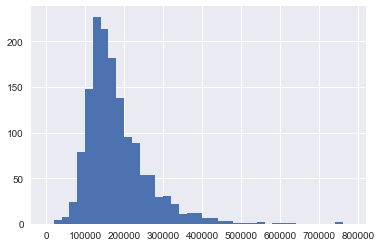

In [20]:
# 4.1 TODO:绘制要求的图形
plt.hist(data_df['SalePrice'], bins=np.arange(0, 800000, 20000));

In [21]:
scipy.stats.skew(data_df['SalePrice'])

1.8793604459195012

回答问题4.1：`'SalePrice'`属于右偏态分布

The skewness is greater than 0. The distribution of SalePrice is right-skewed.

如果特征极其多，很难清晰的看到特征与目标变量之间的关系，就需要利用统计知识来进行多变量分析了。我们常使用[热图heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)结合[corr方法](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)来进行客观分析，热图Heatmap可以用颜色变化来反映变量之间的相关性二维矩阵或说相关性表格中的数据信息，它可以直观地将数据值的大小以定义的颜色深浅表示出来。这个项目，为了简化训练，我们以相关性绝对值大于0.5为界来选取我们需要的特征。

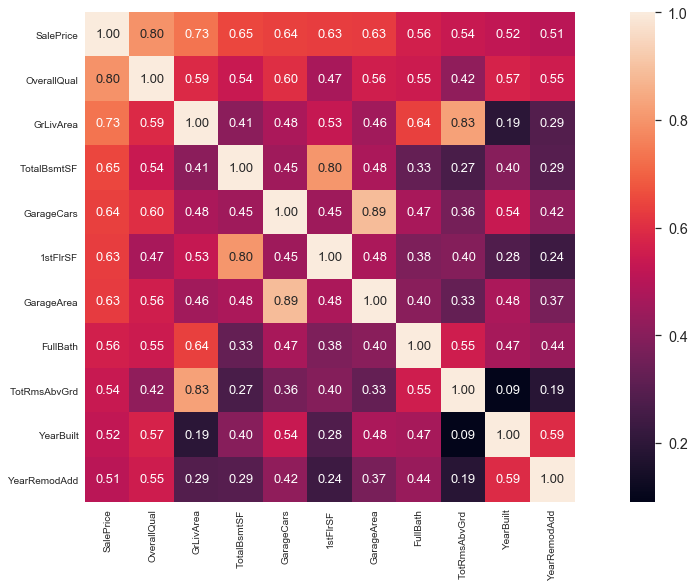

In [22]:
# 不用修改直接运行
corrmat = data_df.corr().abs()
top_corr = corrmat[corrmat["SalePrice"]>0.5].sort_values(by = ["SalePrice"], ascending = False).index
cm = abs(np.corrcoef(data_df[top_corr].values.T))
f, ax = plt.subplots(figsize=(20, 9))
sns.set(font_scale=1.3)
hm = sns.heatmap(cm, cbar=True, annot=True,
                 square=True, fmt='.2f', annot_kws={'size': 13}, 
                 yticklabels=top_corr.values, xticklabels=top_corr.values);
data_df = data_df[top_corr]

我们已经从庞大的特征群中筛选出了最相关的特征，也了解了我们目标数据的分布，那么接下来，我们从创造性方面来对我们的特征进行“改造”。
- **创造性**：创造性主要是说两种情况，一种是对现有数据的处理，比如对类别的独热编码（One-hotEncoder）或者标签编码（LabelEncoder），数值的区间缩放，归一化，标准化等等，另一种就是根据某一个或多个特征创造一个新的特征，例如某特征按组分类(groupby)后，或者某些特征组合后来创造新特征等等。

因为我们筛选出来的特征都为数值类型特征，所以我们只做标准化的操作：这个项目是一个回归类型的项目，而我们的回归算法对标准正态分步预测较为准确，从我们的目标数据可以看出数据是一个偏态分布，那么我们使用log将数据从偏态分布转换为标准正态分布，最后进行标准化。

In [23]:
# 不要修改，直接运行
from scipy.special import boxcox1p
from sklearn.preprocessing import StandardScaler

data_df['SalePrice'] = np.log1p(data_df['SalePrice'])
numeric_features = list(data_df.columns)
numeric_features.remove('SalePrice')
for feature in numeric_features:
    #all_data[feat] += 1
    data_df[feature] = boxcox1p(data_df[feature], 0.15)

scaler = StandardScaler()
scaler.fit(data_df[numeric_features])
data_df[numeric_features] = scaler.transform(data_df[numeric_features])

---
## 第三步. 建立模型
在项目的第三步中，你需要了解必要的工具和技巧来让你的模型能够进行预测。用这些工具和技巧对每一个模型的表现做精确的衡量可以极大地增强你预测的可信度。

### 编程练习5：定义衡量标准
如果不能对模型的训练和测试的表现进行量化地评估，我们就很难衡量模型的好坏。通常我们会定义一些衡量标准，这些标准可以通过对某些误差或者拟合程度的计算来得到。在这个项目中，你将通过运算[决定系数](https://en.wikipedia.org/wiki/Coefficient_of_determination) $R^2$ 来量化模型的表现。模型的决定系数是回归分析中十分常用的统计信息，经常被当作衡量模型预测能力好坏的标准。

$R^2$ 的数值范围从0至1，表示**目标变量**的预测值和实际值之间的相关程度平方的百分比。一个模型的 $R^2$ 值为0还不如直接用**平均值**来预测效果好；而一个 $R^2$ 值为1的模型则可以对目标变量进行完美的预测。从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用**特征**来解释。模型也可能出现负值的 $R^2$，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。



问题5.1:
在下方代码的 `performance_metric` 函数中，你要实现：
- 使用 `sklearn.metrics` 中的 [`r2_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) 来计算 `y_true` 和 `y_predict` 的 $R^2$ 值，作为对其表现的评判。
- 将他们的表现评分储存到 `score` 变量中。

In [24]:
# 5.1 TODO: 引入 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: 计算 'y_true' 与 'y_predict' 的r2值
    score = r2_score(y_true, y_predict)
    
    # 返回这一分数
    return score

问题 5.2:拟合程度

假设一个数据集有五个数据且某一模型做出下列目标变量的预测：

| 真实数值 | 预测数值 |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*你觉得这个模型已成功地描述了目标变量的变化吗？如果成功，请解释为什么，如果没有，也请给出原因。*  

**提示1**：运行下方的代码，使用 `performance_metric` 函数来计算 `y_true` 和 `y_predict` 的决定系数。

**提示2**：$R^2$ 分数是指可以从自变量中预测的因变量的方差比例。 换一种说法：

* $R^2$ 为0意味着因变量不能从自变量预测。
* $R^2$ 为1意味着可以从自变量预测因变量。
* $R^2$ 在0到1之间表示因变量可预测的程度。
* $R^2$ 为0.40意味着 Y 中40％的方差可以从 X 预测。

In [25]:
#TODO 5.2：计算这一模型的表现
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


问题 5.2 - 回答:

The model estimates the target variable well. 92.3% of the variance in Y can be predicted from X.

### 编程练习 6: 数据分割与重排
接下来，你需要分割波士顿房屋数据集，包括特征与目标变量、训练集和测试集。通常在这个过程中，数据也会被重排，以消除数据集中由于顺序而产生的偏差。
在下面的代码中，你需要



**问题6.1：将`data_df`分割为特征和目标变量**

In [26]:
# TODO: 6.1 
labels = np.array(data_df['SalePrice']) #TODO：提取SalePrice作为labels
features = np.array(data_df[numeric_features]) #TODO：提取除了SalePrice以外的特征赋值为features

问题6.2 ：
* 使用 `sklearn.model_selection` 中的 [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)， 将 `features` 和 `prices` 的数据都分成用于训练的数据子集和用于测试的数据子集。
  - 分割比例为：80%的数据用于训练，20%用于测试；
  - 选定一个数值以设定 `train_test_split` 中的 `random_state` ，这会确保结果的一致性；
* 将分割后的训练集与测试集分配给 `X_train`, `X_test`, `y_train` 和 `y_test`。

In [27]:
# TODO: 引入 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: 打乱并分割训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 666)

# 成功~
print("Training and testing split was successful.")

Training and testing split was successful.


问题 6.3 - 训练及测试
*将数据集按一定比例分为训练用的数据集和测试用的数据集对学习算法有什么好处？*

*如果用模型已经见过的数据，例如部分训练集数据进行测试，又有什么坏处？*

**提示：** 如果没有数据来对模型进行测试，会出现什么问题？

问题 6.3 - 回答:

Testing can help find a model that generalizes well. By splitting the data into training set and testing set, we can find a model which performs less well on the training set, but whose errors of testing set are much smaller. The testing set can validate the training set without interference.

If using partial training data to test, the tesing result would definitely be good, however the model cannot be evaluated reasonably.

If there is not a testing set, the model might be overfitted. An overfitting model can fit the training data perfectly, but the distance of testing data from the model would be large.

---
## 第四步. 分析模型的表现
在项目的第四步，我们来观察不同参数下，模型在训练集和验证集上的表现。这里，我们专注于一个特定的算法（带剪枝的决策树[`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)，但这并不是这个项目的重点）和这个算法的一个参数 `'max_depth'`。用全部训练集训练，选择不同`'max_depth'` 参数，观察这一参数的变化如何影响模型的表现。画出模型的表现来对于分析过程十分有益。

### 学习曲线
下方区域内的代码会输出四幅图像，它们是一个决策树模型在不同最大深度下的表现。每一条曲线都直观得显示了随着训练数据量的增加，模型学习曲线在训练集评分和验证集评分的变化，评分使用决定系数 $R^2$。曲线的阴影区域代表的是该曲线的不确定性（用标准差衡量）。

运行下方区域中的代码，并利用输出的图形回答下面的问题。

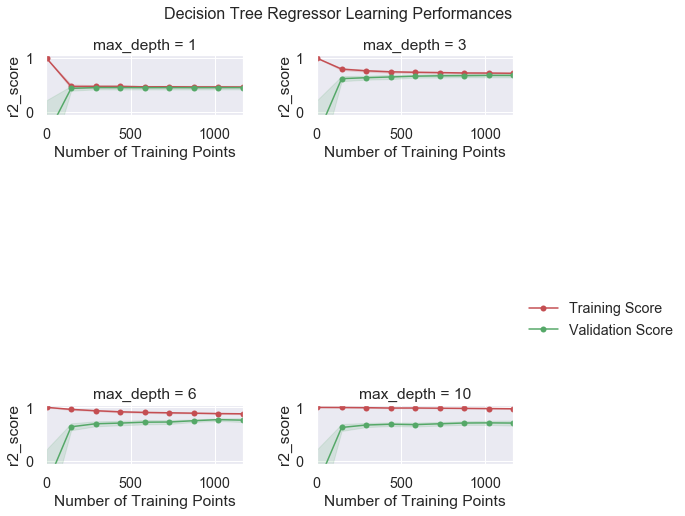

In [28]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, labels)

### 问题 7 - 学习曲线
* 选择上述图像中的其中一个，并给出其最大深度。
* 随着训练数据量的增加，训练集曲线的评分有怎样的变化？验证集曲线呢？
* 如果有更多的训练数据，是否能有效提升模型的表现呢？

**提示：**学习曲线的评分是否最终会收敛到特定的值？一般来说，你拥有的数据越多，模型表现力越好。但是，如果你的训练和测试曲线以高于基准阈值的分数收敛，这是否有必要？基于训练和测试曲线已经收敛的前提下，思考添加更多训练点的优缺点。

问题 7 - 回答:

For the first graph, the max_depth is 1. With the number of training points increasing, the training score decreases to and converges at around 0.4; the validation score increases to and converges at around 0.4.

For the last graph, the max_depth is 10. With the number of training points increasing, the training score decreases a little and converges at nearly 1; the validation score increases to and converges at around 0.75.

From the four graphs we can see for different max_depths, training and validation scores all converge to some values. The model performs better and better with the number of training points increasing, when there are less than 200 training points. When the training points are more than 200, the training score and validation score will converge, and the model cannot perform better. So there is no need to add training points when training and test curves reach the convergence threshold.

### 复杂度曲线
下列代码内的区域会输出一幅图像，它展示了一个已经经过训练和验证的决策树模型在不同最大深度条件下的表现。这个图形将包含两条曲线，一个是训练集的变化，一个是验证集的变化。跟**学习曲线**相似，阴影区域代表该曲线的不确定性，模型训练和测试部分的评分都用的 `performance_metric` 函数。

**运行下方区域中的代码，根据问题5与问题6对输出的图形进行分析并给出你思考的结果。**

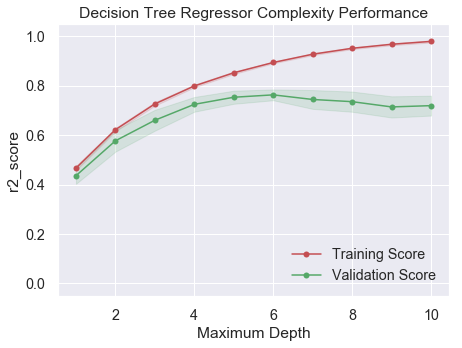

In [29]:
vs.ModelComplexity(X_train, y_train)

### 问题 8 - 偏差（bias）与方差（variance）之间的权衡取舍
* 当模型以最大深度 1训练时，模型的预测是出现很大的偏差还是出现了很大的方差？
* 当模型以最大深度10训练时，情形又如何呢？
* 图形中的哪些特征能够支持你的结论？
  
**提示：** 高偏差表示欠拟合（模型过于简单），而高方差表示过拟合（模型过于复杂，以至于无法泛化）。考虑哪种模型（深度1或10）对应着上述的情况，并权衡偏差与方差。

问题 8 - 回答:

When the maximum depth is 1, there is a large deviation and a small variance, as the training score and validation score are both low at around 0.45. The model fits either the training data or the testing data badly, because it is too simple and underfitting.

When the maximum depth is 10, there is a medium deviation and a large variance, as the training score is high at nearly 1.0, but the validation score is around 0.7. The model fits te training data perfectly but fits the testing data not well, because it is too complicated and overfitting.

### 问题 9- 最优模型的猜测
* 结合复杂度曲线，你认为最大深度是多少的模型能够最好地对未见过的数据进行预测？
* 你得出这个答案的依据是什么？

**提示**：查看问题8上方的图表，并查看模型在不同 `depth`下的验证分数。随着深度的增加模型的表现力会变得更好吗？我们在什么情况下获得最佳验证分数而不会使我们的模型过度复杂？请记住，奥卡姆剃刀：“在竞争性假设中，应该选择假设最少的那一个。”

问题 9 - 回答:

The best maximum depth would be 5 for predicting data.

When the maximum depth is 5 or 6, the validation score is the highest. As the maximum depth increases over 6, the performance of the model does not get better. To make the model not too complex, we choose the maximum depth of 5 to be optimum.

---
## 第五步. 评估模型的表现
在项目的最后一节中，你将构建一个模型，并使用 `fit_model` 中的优化模型去预测客户特征集。

### 问题 10- 网格搜索（Grid Search）
* 什么是网格搜索法？
* 如何用它来优化模型？

**提示**：在解释网格搜索算法时，首先要理解我们为什么使用网格搜索算法，以及我们使用它的最终目的是什么。为了使你的回答更具有说服力，你还可以给出一个模型中可以使用此方法进行优化参数的示例。

问题 10 - 回答:

Grid Search is an algorithm to optimize the model by computing all the combination of given parameters.

Grid Search optimizes the model by making a table with all the possibilities - different parameters, calculating scores by different permutation and combination of parameters, and picking a model with the best score.

Grid Search can better fit the model. Take DecisionTreeRegressor as an example. We need to adjust parameters to find the optimum parameters. Parameters for DecisionTreeRegressor include max_depth, min_weight_fraction_leaf, max_leaf_nodes, [etc](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). If we give 3 possibilities for max_depth and 4 possibilities for max_leaf_nodes, there would be 12 possibilities. Grid Search calculates scores for these 12 possibilities and finds the best combination to fit the model.

### 问题 11 - 交叉验证
- 什么是K折交叉验证法（k-fold cross-validation）？
- [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 是如何结合交叉验证来完成对最佳参数组合的选择的？
- [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 中的`'cv_results_'`属性能告诉我们什么？
- 网格搜索为什么要使用K折交叉验证？K折交叉验证能够避免什么问题？

**提示**：在解释k-fold交叉验证时，一定要理解'k'是什么，和数据集是如何分成不同的部分来进行训练和测试的，以及基于'k'值运行的次数。
在考虑k-fold交叉验证如何帮助网格搜索时，你可以使用特定的数据子集来进行训练与测试有什么缺点，以及K折交叉验证是如何帮助缓解这个问题。

问题 11 - 回答：

- K-Fold Cross Validation is a method to recycle the data in order to avoid using testing data for training. K-Fold Cross Validation breaks the training data into K buckets, trains the model K times, each time using a different bucket as a validation set and the remaining buckets as a training set, and averages the results to get the final model.
- K-Fold Cross Validation provides an average score for each combination of parameters, and returns to GridSearchCV. GridSearchCV forms a matrix for all combinations of parameters, and returns the best score.
- The 'cv_results_' in GridSearchCV returns a dictionary, which indicates the training results for each training/validation for each grid parameter set, including training/validation time, training/validation scores and ranks for different parameters, and statistics for the time and scores.
- If not using K-Fold Cross Validation in GridSearchCV, which means splitting the data into training and validation sets only once, then the splitting would be not representative and would affect the performance of the model on unknown data. K-Fold Cross Validation resamples the data for K times and gives an average result, to largely avoid picking wrong parameters due to unreasonably splitting once.

### 编程练习 7：训练最优模型
在这个练习中，你将需要将所学到的内容整合，使用**决策树算法**训练一个模型。为了得出的是一个最优模型，你需要使用网格搜索法训练模型，以找到最佳的 `'max_depth'` 参数。你可以把`'max_depth'` 参数理解为决策树算法在做出预测前，允许其对数据提出问题的数量。决策树是**监督学习算法**中的一种。

在下方 `fit_model` 函数中，你需要做的是：
1. **定义 `'cross_validator'` 变量**: 使用 `sklearn.model_selection` 中的 [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) 创建一个交叉验证生成器对象;
2. **定义 `'regressor'` 变量**: 使用  `sklearn.tree` 中的 [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) 创建一个决策树的回归函数;
3. **定义 `'params'` 变量**: 为 `'max_depth'` 参数创造一个字典，它的值是从1至10的数组;
4. **定义 `'scoring_fnc'` 变量**: 使用 `sklearn.metrics` 中的 [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html)  创建一个评分函数；
 将 `‘performance_metric’` 作为参数传至这个函数中；
5. **定义 `'grid'` 变量**: 使用 `sklearn.model_selection` 中的 [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 创建一个网格搜索对象；将变量`'regressor'`, `'params'`, `'scoring_fnc'`和 `'cross_validator'` 作为参数传至这个对象构造函数中；
  
如果你对python函数的默认参数定义和传递不熟悉，可以参考这个MIT课程的[视频](http://cn-static.udacity.com/mlnd/videos/MIT600XXT114-V004200_DTH.mp4)。

In [30]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    cross_validator = KFold(random_state=666)
    
    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=666)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':list(range(1, 11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cross_validator' respectively.
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cross_validator)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    print(pd.DataFrame(grid.cv_results_))
    # Return the optimal model after fitting the data
    return grid.best_estimator_

## 第六步. 做出预测
当我们用数据训练出一个模型，它就可用于对新的数据进行预测。在我们的例子--决策树回归函数中，模型已经学会对新输入的数据“提问”，并返回对**目标变量**的预测值。你可以用这些预测来获取未知目标变量的数据的信息，但是，输入的新数据必须不能是已有训练数据之中的。

### 问题 12 - 最优模型
*最优模型的最大深度（maximum depth）是多少？此答案与你在**问题 9**所做的猜测是否相同？*

运行下方区域内的代码，将决策树回归函数代入训练数据的集合，以得到最优化的模型。

In [31]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.001106      0.000409         0.000535        0.000112   
1       0.001123      0.000088         0.000410        0.000009   
2       0.001624      0.000250         0.000431        0.000028   
3       0.001821      0.000006         0.000413        0.000005   
4       0.002229      0.000045         0.000427        0.000012   
5       0.002594      0.000005         0.000425        0.000011   
6       0.002981      0.000008         0.000426        0.000007   
7       0.003399      0.000008         0.000444        0.000013   
8       0.003806      0.000024         0.000467        0.000020   
9       0.004098      0.000018         0.000452        0.000004   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               1   {'max_depth': 1}           0.478109           0.476518   
1               2   {'max_depth': 2}           0.601762           0.597665   
2               3   {'max_de

最终，使用我们确认好的参数来对测试数据进行预测，完成下面的问题，来看看我们的训练结果如何吧

**问题12.1：填入上题所确认的最优参数，查看测试结果**

In [32]:
depth = 6
regressor = DecisionTreeRegressor(max_depth = depth, random_state=666)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = performance_metric(y_test, y_pred)
print("The R2 score is ",score)

The R2 score is  0.754111723298935


In [33]:
performance_metric(y_train, regressor.predict(X_train))

0.8882107846766144

In [34]:
from sklearn.metrics import mean_squared_error

def compute_score(model, X, y):
    X = np.asarray(X)
    y = np.asarray(y)
    kf = KFold(n_splits=5, shuffle=True, random_state=666)
    scores = []
    for train_index, test_index in kf.split(X):
        model.fit(X[train_index], y[train_index])
        predictions = model.predict(X[test_index])
        scores.append(np.sqrt(mean_squared_error(predictions, y[test_index])))
    return np.mean(scores), np.std(scores)

In [35]:
print("The mean and standard deviation of the distance between predicted y and actual y for the testing set are %s and %s." % compute_score(regressor, X_train, y_train))

The mean and standard deviation of the distance between predicted y and actual y for the testing set are 0.19728372717409287 and 0.009009339629186767.


**问题12.2：你刚刚计算了最优模型在测试集上的决定系数，你会如何评价这个结果？还有什么地方可以改进，以提升这一分数呢？**

回答问题12.2：

The optimized model predicts the tesing set well. The model can predict 75.4% of the variance in Y from X.

To improve the model, three methods as below are used.

1) Adjust more parameters.

In [36]:
def fit_model_para(X, y):
    """ Performs grid search over 'max_depth', 'min_samples_leaf',
        and 'min_samples_split' parameter for a decision tree 
        regressor trained on the input data [X, y]. """
        
    cross_validator = KFold(random_state=666)
    
    regressor = DecisionTreeRegressor(random_state=666)

    params = {'max_depth':list(range(1, 11)), 
              'min_samples_leaf':list(range(1, 11)), 
              'min_samples_split':list(range(2, 11))}

    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cross_validator)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [37]:
# Fit the training data to the model using grid search
reg = fit_model_para(X_train, y_train)

# Produce parameters for the optimal model
best_max_depth = reg.get_params()['max_depth']
best_min_samples_leaf = reg.get_params()['min_samples_leaf']
best_min_samples_split = reg.get_params()['min_samples_split']

print("Parameters 'max_depth', 'min_samples_leaf', and 'min_samples_split' are {}, {}, and {} for the optimal model.".format(best_max_depth, best_min_samples_leaf, best_min_samples_split))

Parameters 'max_depth', 'min_samples_leaf', and 'min_samples_split' are 10, 7, and 2 for the optimal model.


In [38]:
regressor = DecisionTreeRegressor(max_depth=best_max_depth, 
                                  min_samples_leaf=best_min_samples_leaf, 
                                  min_samples_split=best_min_samples_split,
                                  random_state=666)
regressor.fit(X_train, y_train)
train_score = performance_metric(y_train, regressor.predict(X_train))
test_score = performance_metric(y_test, regressor.predict(X_test))
print("The R2 score for training set and testing set are {} and {}.".format(train_score, test_score))

The R2 score for training set and testing set are 0.9051005901006687 and 0.79514915447648.


In [39]:
print("The mean and standard deviation of the distance between predicted y and actual y for the testing set are %s and %s." % compute_score(regressor, X_train, y_train))

The mean and standard deviation of the distance between predicted y and actual y for the testing set are 0.18492728850593929 and 0.004958540733680671.


By defining more parameters min_samples_leaf and min_samples_split, the model can predict the testing set better, as R2 score increases to 0.795, and the distance between predicted y and actual y decreases to 0.1849.

2) Try GradientBoostingRegressor to fit the model.

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
def fit_model_gb(X, y):
    """ Performs grid search over 'max_depth', 'learning_rate', 
        and 'n_estimators' parameters for a gradient boosting 
        regressor trained on the input data [X, y]. """
    
    cross_validator = KFold(random_state=666)
    
    regressor = GradientBoostingRegressor(criterion='friedman_mse', presort='auto', random_state=666)

    params = {'max_depth': [1, 2, 3], 
              'learning_rate': [0.05, 0.75, 0.10], 
              'n_estimators': [100, 200, 300]}

    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cross_validator)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [42]:
# Fit the training data to the model using grid search
reg = fit_model_gb(X_train, y_train)

# Produce parameters for the optimal model
best_max_depth = reg.get_params()['max_depth']
best_learning_rate = reg.get_params()['learning_rate']
best_n_estimators = reg.get_params()['n_estimators']

print("Parameters 'max_depth', 'learning_rate', and 'n_estimators' are {}, {}, and {} for the optimal model.".format(best_max_depth, best_learning_rate, best_n_estimators))

Parameters 'max_depth', 'learning_rate', and 'n_estimators' are 2, 0.1, and 100 for the optimal model.


In [43]:
regressor = GradientBoostingRegressor(max_depth=best_max_depth,
                                      learning_rate=best_learning_rate,
                                      n_estimators=best_n_estimators,
                                      random_state=666)
regressor.fit(X_train, y_train)
train_score = performance_metric(y_train, regressor.predict(X_train))
test_score = performance_metric(y_test, regressor.predict(X_test))
print("The R2 score for training set and testing set are {} and {}.".format(train_score, test_score))

The R2 score for training set and testing set are 0.8977357843824896 and 0.848973917859992.


In [44]:
print("The mean and standard deviation of the distance between predicted y and actual y for the testing set are %s and %s." % compute_score(regressor, X_train, y_train))

The mean and standard deviation of the distance between predicted y and actual y for the testing set are 0.15393701139216592 and 0.006331063018424324.


The GradientBoostingRegressor algorithm increases the R2 score to 0.849, and reduces the distance between predicted y and actual y to 0.1539, so the model predicts the testing data better.

3) Try XGBRegressor to fit the model.

In [45]:
import xgboost as xgb
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [46]:
model = xgb.XGBRegressor(learning_rate=0.04, max_depth=2, n_estimators=500, 
                         objective='reg:squarederror', random_state=666)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = performance_metric(y_test, y_pred)
print("The R2 score is ",score)

The R2 score is  0.8478341553846518


In [47]:
print("The mean and standard deviation of the distance between predicted y and actual y for the testing set are %s and %s." % compute_score(model, X_train, y_train))

The mean and standard deviation of the distance between predicted y and actual y for the testing set are 0.15242786389084367 and 0.0060962167015618865.


The R2 score for XGBRegressor algorithm is also high at 0.848, and the distance between predicted y and actual y is reduced to 0.1524, so this model also predicts the testing data well.


There are limitations in this model. The data is from 2006 to 2010 in Boston, so the prediction might be out of date and limited to downtown Boston. From 2000s to 2010s, the house price would be influenced by inflation, policies, city development, etc. In rural areas, people's preference is different from that in cities, such as the location, traffic, and public facilities.

To better predict house prices in different time periods and different places, more data can be collected. Also, parameters for time and location can be incorporated.